<a href="https://colab.research.google.com/github/suhani8338/linear_regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('train.csv')
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [34]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


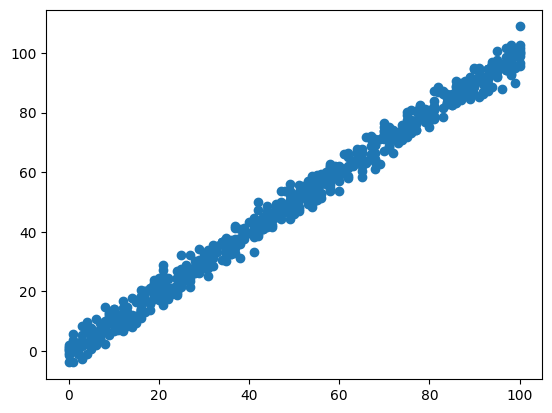

In [35]:
plt.scatter(data.x, data.y)
plt.show()

In [ ]:
def loss(m, b, p):
  total_error = 0
  for i in range(len(p)):
    x = p[i][0]
    y = p[i][1]
    total_error += (y - (m * x + b)) ** 2
  return total_error / len(p)

In [36]:
def grad_descent(m_curr, b_curr, p, learning_rate):
  m_grad = 0
  b_grad = 0

  n = len(p)
  for i, row in p.iterrows():
    x = row.x  # Access 'x' column
    y = row.y  # Access 'y' column
    m_grad += -(2/n) * x * (y - (m_curr * x + b_curr))
    b_grad += -(2/n) * (y - (m_curr * x + b_curr))

  new_m = m_curr - learning_rate * m_grad
  new_b = b_curr - learning_rate * b_grad
  return new_m, new_b

In [37]:
m = 0
b = 0
learning_rate = 0.0000005
epochs = 1000

for i in range(epochs):
  if i % 50 == 0:
    print(f"Epoch {i}")
    print(m , b)

  m, b = grad_descent(m, b, data, learning_rate)



Epoch 0
0 0
Epoch 50
0.15382826598561197 0.0023030851450513254
Epoch 100
0.28396557070462686 0.004251238097775459
Epoch 150
0.3940605396282865 0.005899121676324746
Epoch 200
0.4871998764180866 0.007292980123159339
Epoch 250
0.5659949040418096 0.00847193564296967
Epoch 300
0.6326547777634122 0.009469085261859264
Epoch 350
0.6890484226605208 0.010312428760146323
Epoch 400
0.7367569321957658 0.011025653694997329
Epoch 450
0.7771178969272172 0.011628799522370106
Epoch 500
0.8112629061905637 0.012138819438082322
Epoch 550
0.8401492741780427 0.012570055690198825
Epoch 600
0.864586879910034 0.012934641688948931
Epoch 650
0.885260873604688 0.013242842188025869
Epoch 700
0.9027508860582358 0.013503341074843902
Epoch 750
0.9175472796044217 0.013723484838454536
Epoch 800
0.9300648962770366 0.01390948854116903
Epoch 850
0.9406546886292371 0.0140666100686607
Epoch 900
0.9496135592999412 0.014199297543952114
Epoch 950
0.957192685196695 0.014311314038295343


In [38]:
m, b

(0.9636045596779746, 0.01440584307543205)

In [41]:
test_data = pd.read_csv('test.csv')
test_data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [42]:
test_data['y_hat']= test_data['x']*m+b
test_data.head()

,x,y,y_hat
0,77,79.775152,74.211957
1,21,23.177279,20.250102
2,22,25.609262,21.213706
3,20,17.857388,19.286497
4,36,41.849864,34.704170


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
 2   y_hat   300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_data['y'], test_data['y_hat'])

15.691357782658196

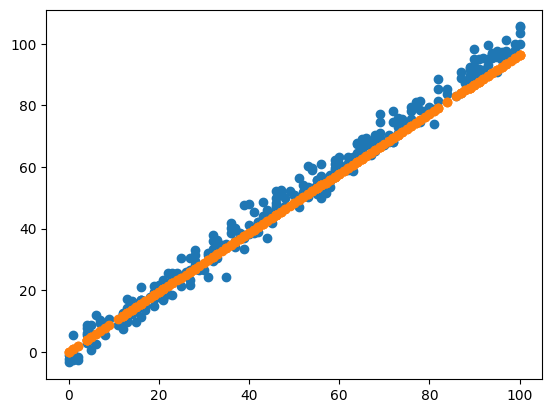

In [ ]:
plt.scatter(test_data.x, test_data.y)
plt.scatter(test_data.x, test_data.y_hat)
plt.show()